In [1]:
#In data science, an important step is to import the necessary libraries, 
#which are collections of pre-written code that can be used to perform various tasks. 
#Libraries are typically imported at the beginning of a script or notebook using the import statement.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
from random import randint
from sklearn.utils import resample
from IPython.display import HTML,display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [4]:
#creating dataframe with images filepaths and class labels. 
#To collect image filepaths glob library used.'''


df=pd.DataFrame()
df['filepaths']=glob("MIAS Dataset/**/*.*",recursive=True)
df['labels']=df['filepaths'].apply(lambda x: x.split("/")[1])
df.head()

,filepaths,labels
0,MIAS Dataset/Malignant Masses/mdb148 (46).png,Malignant Masses
1,MIAS Dataset/Malignant Masses/mdb178 (13).png,Malignant Masses
2,MIAS Dataset/Malignant Masses/mdb023 (54).png,Malignant Masses
3,MIAS Dataset/Malignant Masses/mdb186 (39).png,Malignant Masses
4,MIAS Dataset/Malignant Masses/mdb179 (13).png,Malignant Masses


In [5]:
df.tail()

,filepaths,labels
3811,MIAS Dataset/Benign Masses/mdb059 (31).png,Benign Masses
3812,MIAS Dataset/Benign Masses/mdb069 (64).png,Benign Masses
3813,MIAS Dataset/Benign Masses/mdb002 (32).png,Benign Masses
3814,MIAS Dataset/Benign Masses/mdb015 (52).png,Benign Masses
3815,MIAS Dataset/Benign Masses/mdb032 (67).png,Benign Masses


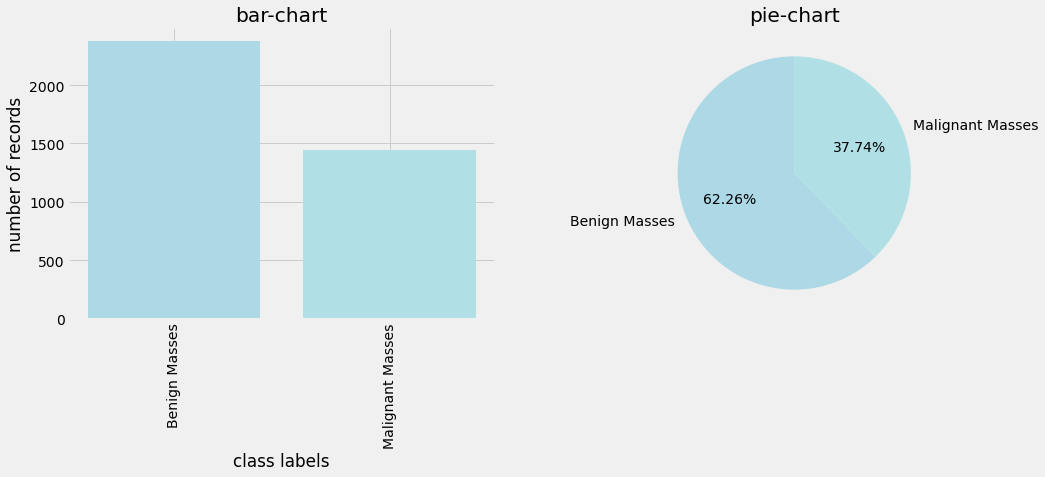

In [6]:
# From the generated data frame labels feature used to plot the below visualization.
#target classes are benign and malignant. with the size of classes below bar-char and pie-chart plotted
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(15,5))
    plt.rcParams['font.size']
    plt.subplot(121)
    plt.bar(x=dict(df['labels'].value_counts()).keys(),
          height=dict(df['labels'].value_counts()).values(),
          color=['lightblue','powderblue'])
    plt.title(label="bar-chart")
    plt.xlabel(xlabel="class labels")
    plt.ylabel(ylabel="number of records")
    plt.xticks(rotation=90)
    plt.subplot(122)
    plt.pie(x=dict(df['labels'].value_counts()).values(),
          labels=dict(df['labels'].value_counts()).keys(),
          autopct="%.2f%%",
          startangle=90,
          colors=['lightblue','powderblue'])
    plt.title(label="pie-chart")
    plt.show()

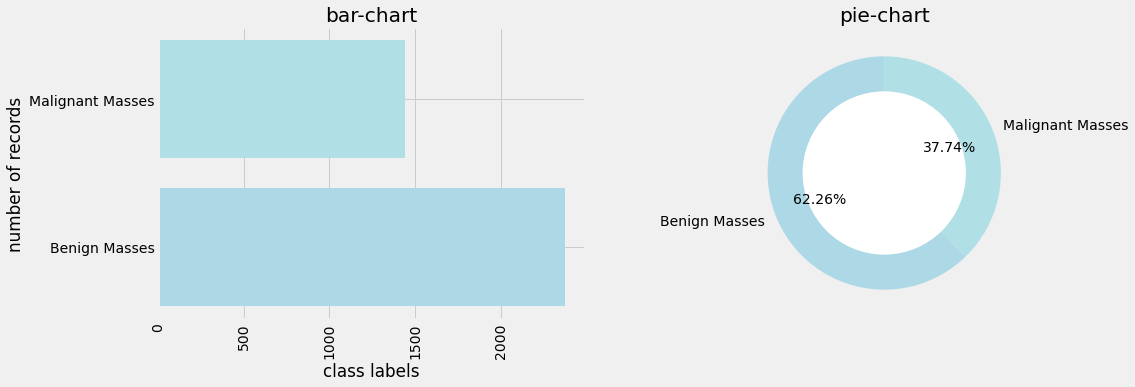

In [7]:
#with the size of classes below barh-char and donut-chart plotted
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(15,5))
    plt.rcParams['font.size']
    plt.subplot(121)
    plt.barh(y=list(dict(df['labels'].value_counts()).keys()),
          width=list(dict(df['labels'].value_counts()).values()),
           color=['lightblue','powderblue'])
    plt.title(label="bar-chart")
    plt.xlabel(xlabel="class labels")
    plt.ylabel(ylabel="number of records")
    plt.xticks(rotation=90)
    plt.subplot(122)
    plt.pie(x=list(dict(df['labels'].value_counts()).values()),
          labels=list(dict(df['labels'].value_counts()).keys()),
          autopct="%.2f%%",
          startangle=90,
          colors=['lightblue','powderblue'])
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label="pie-chart")
    plt.show()

In [8]:
print(f"before label encoding : {df['labels'].unique().tolist()}")
df['labels']=df['labels'].map({'Benign Masses':0,'Malignant Masses':1})
print(f"after label encoding : {df['labels'].unique().tolist()}")

before label encoding : ['Malignant Masses', 'Benign Masses']
after label encoding : [1, 0]


In [12]:
# In the further statements filepaths collected from the dataframe and data loading has been performed

%time

resampled=[]
for label in df['labels'].unique().tolist():
    resampled.append(resample(df.loc[df['labels']==label],n_samples=df['labels'].value_counts().max()))
df=pd.concat(objs=resampled,ignore_index=True)

filepaths=df['filepaths'].to_list()
labels=df['labels'].to_list()

data=[]
for filepath in filepaths:
    image=load_img(path=filepath,grayscale=False,color_mode='rgb',target_size=(128,128))
    image=img_to_array(img=image)
    image=image/255.0
    data.append(image)
data=np.array(data)
print("Data loading completed...")

CPU times: user 5 µs, sys: 11 µs, total: 16 µs
Wall time: 14.8 µs
Data loading completed...


In [13]:
# data splitting performed with the help of train_test_split from the scikit-learn
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42,shuffle=True,stratify=labels)

In [14]:
# The below function created to display the images randomly from train data and test data.
def show_images(X,y):
    labels=['Benign Masses','Malignant Masses']
    plt.figure(figsize=(15, 15))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        idx = randint(0, X.shape[0]-1)
        plt.imshow(X[idx])
        plt.axis("off")
        plt.title("Class:{}".format(labels[y[idx]]))

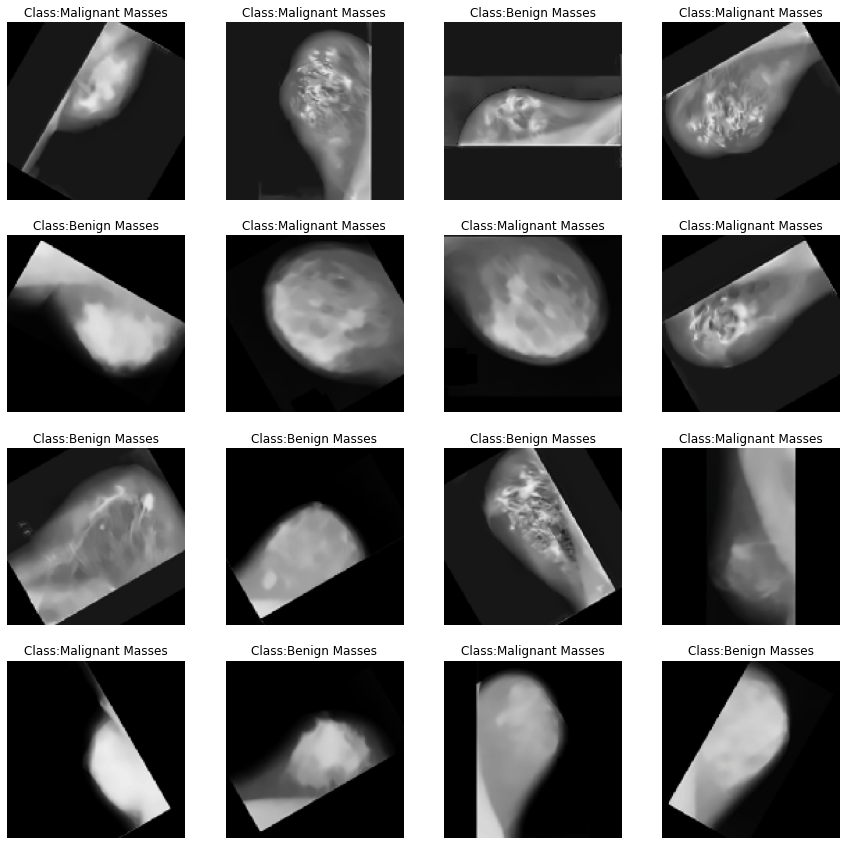

In [15]:
show_images(X_train,y_train)

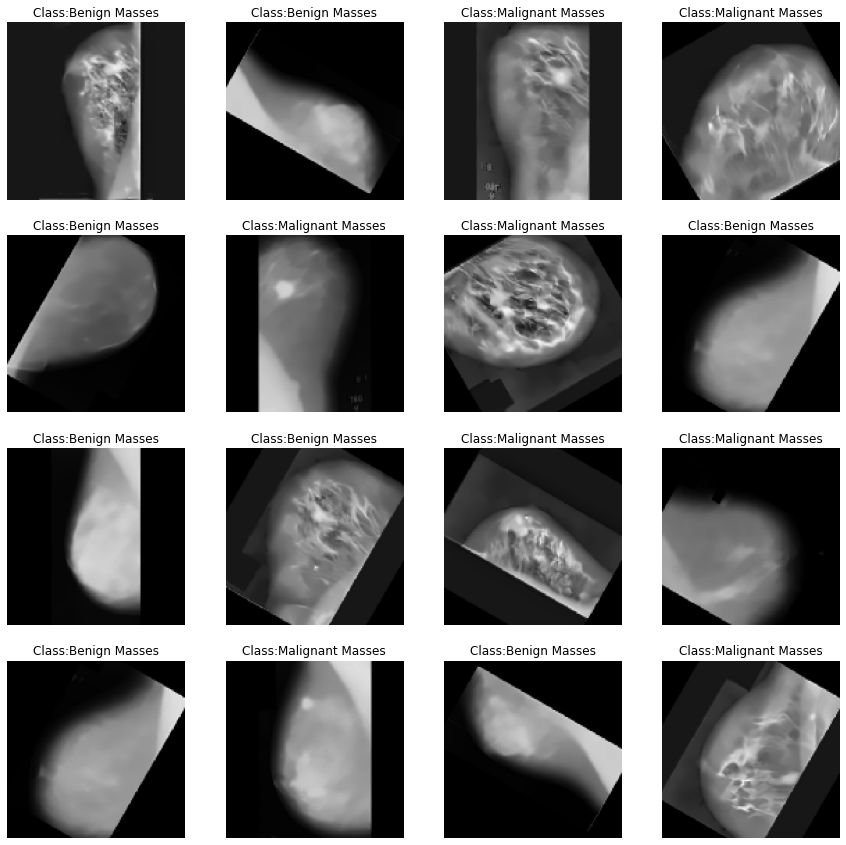

In [11]:
show_images(X_test,y_test)

In [16]:
'''The to_categorical function from TensorFlow is used to convert a class vector (integers) 
to a binary class matrix, which is also known as one-hot encoding. 
One-hot encoding is a process of converting categorical variables into a numerical 
format that can be used by machine learning algorithms.'''

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
'''The ImageDataGenerator class from TensorFlow is used to generate batches of tensor 
image data with real-time data augmentation. The class provides a convenient way to 
create image data generators for deep learning model training.'''

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

In [20]:
'''
Transfer learning is a technique where a pre-trained model, such as DenseNet201, 
is used as a starting point for a new task, rather than training a model from scratch. 
The pre-trained model is used to extract features from the input images, 
which are then fed into a new classifier that is trained specifically for the new task.

The basic process of transfer learning with DenseNet201 is as follows:

1)The pre-trained DenseNet201 model is loaded from the TensorFlow library
2)The final fully connected layer of the DenseNet201 model is removed.
3)The output of the DenseNet201 model is fed as input to a new fully connected layer, 
which is trained to predict the new classes of the task.
4)The weights of the pre-trained DenseNet201 model are frozen, so that only the new 
fully connected layer will be trained.
5)The new fully connected layer is trained using the new data
6)The new fully connected layer is used to make predictions on new images

This approach allows us to take advantage of the knowledge learned by the pre-trained model 
on a large dataset, and adapt it to the new task with a smaller dataset.
'''

densenet_model=tf.keras.applications.DenseNet201(include_top=False,
                                                   weights="imagenet",
                                                   input_tensor=None,
                                                   input_shape=(128,128,3),
                                                   pooling="max",
                                                   classes=1000)
densenet_model.trainable = False

In [21]:
inputs = densenet_model.input
m = tf.keras.layers.Dense(512, activation='relu')(densenet_model.output)
m = tf.keras.layers.Dropout(rate=0.3)(m)
outputs = tf.keras.layers.Dense(2, activation='sigmoid')(m)
dense_model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [22]:
dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [23]:
dense_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1/conv[0][0]']         

                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 32, 32, 192)  0          ['conv2_block3_concat[0][0]',    
 te)      

 conv3_block2_1_conv (Conv2D)   (None, 16, 16, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block2_1_relu[0][0]']    
                                                                                                  
 conv3_blo

                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 16, 16, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 16, 16, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block7_0_relu (Activatio  (None, 16, 16, 320)  0          ['conv3_block7_0_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 16, 16, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 16, 16, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_blo

 conv4_block3_0_bn (BatchNormal  (None, 8, 8, 320)   1280        ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 8, 8, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 8, 8, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_concat (Concatena  (None, 8, 8, 480)   0           ['conv4_block6_concat[0][0]',    
 te)      

 conv4_block11_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 8, 8, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 8, 8, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 8, 8, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_0_relu (Activati  (None, 8, 8, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 8, 8, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block16_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 8, 8, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block24_concat (Concaten  (None, 8, 8, 1024)  0           ['conv4_block23_concat[0][0]',   
 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 conv4_block25_0_bn (BatchNorma  (None, 8, 8, 1024)  4096        ['conv4_block24_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_0_relu (Activati  (None, 8, 8, 1024)  0           ['conv4_block25_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_1_conv (Conv2D)  (None, 8, 8, 128)    131072      ['conv4_block25_0_relu[0][0]']   
          

 on)                                                                                              
                                                                                                  
 conv4_block29_1_conv (Conv2D)  (None, 8, 8, 128)    147456      ['conv4_block29_0_relu[0][0]']   
                                                                                                  
 conv4_block29_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block29_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block29_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block29_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block33_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block33_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block33_1_relu[0][0]']   
                                                                                                  
 conv4_block33_concat (Concaten  (None, 8, 8, 1312)  0           ['conv4_block32_concat[0][0]',   
 ate)                                                             'conv4_block33_2_conv[0][0]']   
                                                                                                  
 conv4_block34_0_bn (BatchNorma  (None, 8, 8, 1312)  5248        ['conv4_block33_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block38_0_bn (BatchNorma  (None, 8, 8, 1440)  5760        ['conv4_block37_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block38_0_relu (Activati  (None, 8, 8, 1440)  0           ['conv4_block38_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block38_1_conv (Conv2D)  (None, 8, 8, 128)    184320      ['conv4_block38_0_relu[0][0]']   
                                                                                                  
 conv4_block38_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block38_1_conv[0][0]']   
 lization)

 conv4_block42_1_conv (Conv2D)  (None, 8, 8, 128)    200704      ['conv4_block42_0_relu[0][0]']   
                                                                                                  
 conv4_block42_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block42_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block42_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block42_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block42_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block42_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block46_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block46_1_relu[0][0]']   
                                                                                                  
 conv4_block46_concat (Concaten  (None, 8, 8, 1728)  0           ['conv4_block45_concat[0][0]',   
 ate)                                                             'conv4_block46_2_conv[0][0]']   
                                                                                                  
 conv4_block47_0_bn (BatchNorma  (None, 8, 8, 1728)  6912        ['conv4_block46_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block47_0_relu (Activati  (None, 8, 8, 1728)  0           ['conv4_block47_0_bn[0][0]']     
 on)      

 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_block2_concat (Concatena  (None, 4, 4, 960)   0           ['conv5_block1_concat[0][0]',    
 te)                                                              'conv5_block2_2_conv[0][0]']    
                                                                                                  
 conv5_block3_0_bn (BatchNormal  (None, 4, 4, 960)   3840        ['conv5_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_blo

 conv5_block7_0_bn (BatchNormal  (None, 4, 4, 1088)  4352        ['conv5_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block7_0_relu (Activatio  (None, 4, 4, 1088)  0           ['conv5_block7_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block7_1_conv (Conv2D)   (None, 4, 4, 128)    139264      ['conv5_block7_0_relu[0][0]']    
                                                                                                  
 conv5_block7_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv5_block7_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block11_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block11_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block11_1_relu[0][0]']   
                                                                                                  
 conv5_block11_concat (Concaten  (None, 4, 4, 1248)  0           ['conv5_block10_concat[0][0]',   
 ate)     

 conv5_block15_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block15_1_relu[0][0]']   
                                                                                                  
 conv5_block15_concat (Concaten  (None, 4, 4, 1376)  0           ['conv5_block14_concat[0][0]',   
 ate)                                                             'conv5_block15_2_conv[0][0]']   
                                                                                                  
 conv5_block16_0_bn (BatchNorma  (None, 4, 4, 1376)  5504        ['conv5_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block16_0_relu (Activati  (None, 4, 4, 1376)  0           ['conv5_block16_0_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv5_block20_0_relu (Activati  (None, 4, 4, 1504)  0           ['conv5_block20_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block20_1_conv (Conv2D)  (None, 4, 4, 128)    192512      ['conv5_block20_0_relu[0][0]']   
                                                                                                  
 conv5_block20_1_bn (BatchNorma  (None, 4, 4, 128)   512         ['conv5_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block20_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block20_1_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv5_block24_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block24_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block24_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block24_1_relu[0][0]']   
                                                                                                  
 conv5_block24_concat (Concaten  (None, 4, 4, 1664)  0           ['conv5_block23_concat[0][0]',   
 ate)                                                             'conv5_block24_2_conv[0][0]']   
                                                                                                  
 conv5_blo

 conv5_block28_concat (Concaten  (None, 4, 4, 1792)  0           ['conv5_block27_concat[0][0]',   
 ate)                                                             'conv5_block28_2_conv[0][0]']   
                                                                                                  
 conv5_block29_0_bn (BatchNorma  (None, 4, 4, 1792)  7168        ['conv5_block28_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block29_0_relu (Activati  (None, 4, 4, 1792)  0           ['conv5_block29_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block29_1_conv (Conv2D)  (None, 4, 4, 128)    229376      ['conv5_block29_0_relu[0][0]']   
          

 max_pool (GlobalMaxPooling2D)  (None, 1920)         0           ['relu[0][0]']                   
                                                                                                  
 dense (Dense)                  (None, 512)          983552      ['max_pool[0][0]']               
                                                                                                  
 dropout (Dropout)              (None, 512)          0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 2)            1026        ['dropout[0][0]']                
                                                                                                  
Total params: 19,306,562
Trainable params: 984,578
Non-trainable params: 18,321,984
__________________________________________________________________________________________________


In [24]:
%%time
# Model Training
history = dense_model.fit(datagen.flow(X_train,y_train,batch_size=16),validation_data = (X_test, y_test),epochs=50)

Epoch 1/50
238/238 [==============================] - 192s 774ms/step - loss: 0.8364 - accuracy: 0.5941 - val_loss: 0.6073 - val_accuracy: 0.6824
Epoch 2/50
238/238 [==============================] - 186s 782ms/step - loss: 0.6370 - accuracy: 0.6775 - val_loss: 0.5626 - val_accuracy: 0.7066
Epoch 3/50
238/238 [==============================] - 187s 787ms/step - loss: 0.5945 - accuracy: 0.6924 - val_loss: 0.5420 - val_accuracy: 0.7319
Epoch 4/50
238/238 [==============================] - 182s 764ms/step - loss: 0.5533 - accuracy: 0.7272 - val_loss: 0.5084 - val_accuracy: 0.7455
Epoch 5/50
238/238 [==============================] - 183s 768ms/step - loss: 0.5386 - accuracy: 0.7314 - val_loss: 0.4917 - val_accuracy: 0.7676
Epoch 6/50
238/238 [==============================] - 185s 779ms/step - loss: 0.5066 - accuracy: 0.7564 - val_loss: 0.4782 - val_accuracy: 0.7729
Epoch 7/50
238/238 [==============================] - 2085s 9s/step - loss: 0.4855 - accuracy: 0.7701 - val_loss: 0.4646 - v

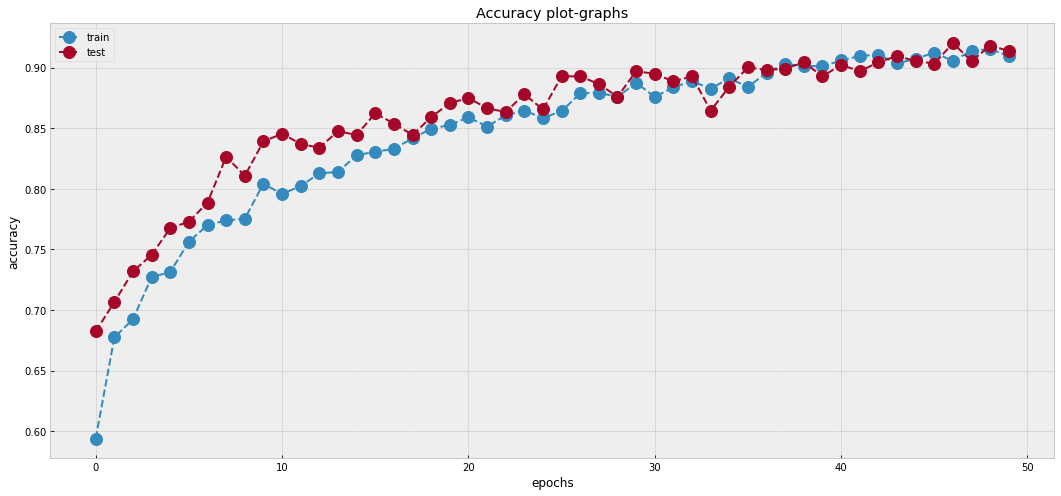

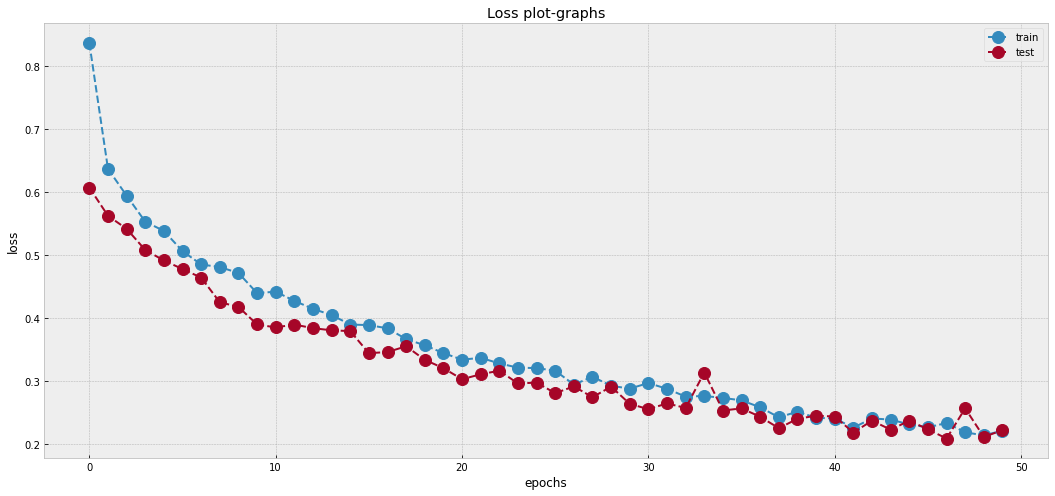

In [25]:
#Accuracy and Loss plot-graphs
with plt.style.context(style="bmh"):
    plt.figure(figsize=(18,8))
    plt.plot(history.history['accuracy'],marker="o",linestyle='dashed',linewidth=2, markersize=12)
    plt.plot(history.history['val_accuracy'],marker="o",linestyle='dashed',linewidth=2, markersize=12)
    plt.title('Accuracy plot-graphs')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history['loss'],marker="o",linestyle='dashed',linewidth=2, markersize=12)
    plt.plot(history.history['val_loss'],marker="o",linestyle='dashed',linewidth=2, markersize=12)
    plt.title('Loss plot-graphs')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [26]:
%%time
# Model prediction
test_pred = dense_model.predict(X_test,batch_size=16,verbose=1)

60/60 [==============================] - 54s 750ms/step
CPU times: user 1min 46s, sys: 1min 18s, total: 3min 4s
Wall time: 54.5 s


In [ ]:
print(test_pred)

[[0.01675    0.9820695 ]
 [0.00641067 0.99476886]
 [0.01037591 0.98977566]
 ...
 [0.03173337 0.96569955]
 [0.02194553 0.96963507]
 [0.99709713 0.00278397]]


In [ ]:
#probability output into label convertion
predictions = []
for p in test_pred:
    result = np.argmax(p)      
    predictions += [result]
print(predictions)

[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 

In [ ]:
true = []
for p in y_test:
    result = np.argmax(p)      
    true += [result]
print(true)

[1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 

In [ ]:
LABELS=['Benign Masses','Malignant Masses']

In [ ]:
# accuracy score metric used to evaluate overall validated accuracy of the model

accuracy = accuracy_score(true, predictions)
print(f"Densenet201 Model Validated Accuracy is {accuracy*100.0:.2f}%")

Densenet201 Model Validated Accuracy is 91.69%


In [ ]:
"""test data for which the true values are known. It includes several metrics that provide a 
comprehensive evaluation of the model's performance, including precision, recall, f1-score, 
and support.

Precision measures the proportion of true positive predictions made by the model among all 
positive predictions. Recall measures the proportion of true positive predictions made by 
the model among all actual positive instances. F1-score is the harmonic mean of precision and 
recall. Support is the number of samples of the true response that lie in that class."""

display(HTML("<h2> classification report of densenet201 model </h2>"))
print(classification_report(y_true=true,y_pred=predictions,target_names=LABELS))

                  precision    recall  f1-score   support

   Benign Masses       0.88      0.96      0.92       476
Malignant Masses       0.96      0.87      0.91       475

        accuracy                           0.92       951
       macro avg       0.92      0.92      0.92       951
    weighted avg       0.92      0.92      0.92       951



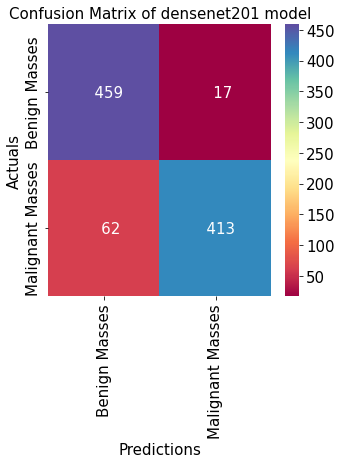

In [ ]:
'''The general purpose of confusion matrix is to display correctly predicted counts and incorrectly
predicted counts in each classes.
'''

plt.figure(figsize=(5,5))
plt.rcParams['font.size']=15
sns.heatmap(data=confusion_matrix(y_true=true,y_pred=predictions),
            cmap=plt.cm.Spectral,
            annot=True,
            fmt='5g',
            xticklabels=LABELS,
            yticklabels=LABELS,
            linecolor='black',)
plt.title('Confusion Matrix of densenet201 model', fontsize=15)
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.show()

In [ ]:
#model saving
dense_model.save("models/densenet201_model.h5")

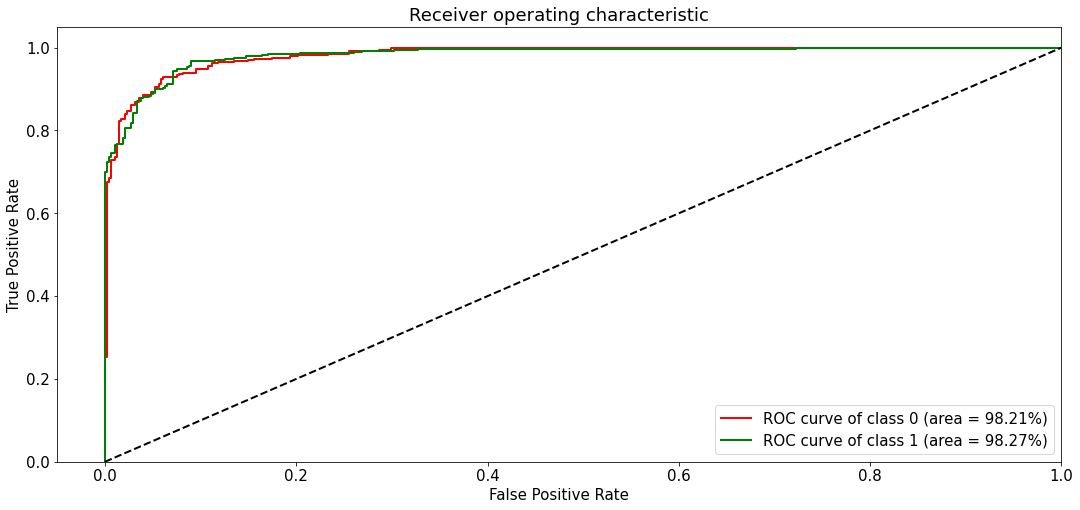

In [ ]:
'''
A ROC (Receiver Operating Characteristic) curve is a graphical representation of the 
performance of a binary classifier system'''

from sklearn.metrics import roc_curve, auc
from itertools import cycle
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=2
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true, test_pred[:,i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['red', 'green'])
plt.figure(figsize=(18,8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f}%)'
             ''.format(i, roc_auc[i]*100))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()